In [44]:
# gplearn tutorial    https://gplearn.readthedocs.io/en/latest/examples.html
import pandas as pd
from gplearn.genetic import SymbolicClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import graphviz
import random

In [46]:
df = pd.read_csv('D:/comp2020/420/ass2_data/ass2_data/part4/satellite.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,Target
0,46,40,119,139,42,30,135,157,42,30,...,113,50,46,111,116,44,31,131,142,'Anomaly'
1,47,37,119,133,44,34,124,143,44,34,...,85,50,39,118,132,43,29,133,143,'Anomaly'
2,80,95,100,74,64,64,104,96,46,36,...,81,82,91,92,78,78,83,96,74,'Anomaly'
3,56,51,72,60,59,54,72,60,59,51,...,50,57,55,74,61,57,55,78,65,'Anomaly'
4,44,34,129,140,44,34,124,136,44,34,...,139,43,31,128,135,43,29,128,132,'Anomaly'


In [47]:
column_headers = list(df.columns.values)
print(column_headers)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'Target']


In [48]:
len(column_headers)

37

In [49]:
target_name = 'Target'
y = df[target_name]

y[0]

"'Anomaly'"

In [50]:
feature_names = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
                  'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 
                 'V35', 'V36']

X = df[feature_names]
X.shape

(195, 36)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=789)

In [119]:
X_train.shape

(146, 36)

In [120]:
X_test.shape

(49, 36)

In [121]:
# # # models = {'sr': SymbolicRegressor(generations=15, verbose=4, max_samples=0.8，random_state=180)}
# models = {'sc':SymbolicClassifier(generations=20, verbose=4,parsimony_coefficient=.01,
#             feature_names=feature_names,
#             random_state=42)}


In [122]:
# for model_name, model_instance in models.items():
#     print('Training model {}'.format(model_name))
#     model_instance.fit(X_train, y_train)

In [123]:
# model_instance.fit(X_train, y_train)

In [124]:
import gplearn as gp
import numpy as np

function_set = ['add', 'sub', 'mul', 'div','log','sin','cos']

In [128]:
est = SymbolicClassifier(parsimony_coefficient=.01,
                         feature_names=feature_names,
                         function_set=function_set,
                         random_state=4567)
est.fit(X_train, y_train)

SymbolicClassifier(const_range=(-1.0, 1.0),
                   feature_names=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                  'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                  'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                  'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                  'V27', 'V28', 'V29', 'V30', ...],
                   function_set=['add', 'sub', 'mul', 'div', 'log', 'sin',
                                 'cos'],
                   generations=20, init_depth=(2, 6),
                   init_method='half and half', low_memory=False,
                   max_samples=1.0, metric='log loss', n_jobs=1,
                   p_crossover=0.9, p_hoist_mutation=0.01,
                   p_point_mutation=0.01, p_point_replace=0.05,
                   p_subtree_mutation=0.01, parsimony_coefficient=0.01,
                   population_size=1000, random_state=4567,
                   stop

In [130]:
from sklearn.metrics import roc_auc_score
y_true = y_train
y_score = est.predict_proba(X_train)[:,1]
roc_auc_score(y_true, y_score)

0.8728174603174603

In [131]:
from sklearn.metrics import roc_auc_score
y_true = y_test
y_score = est.predict_proba(X_test)[:,1]
roc_auc_score(y_true, y_score)

0.893859649122807

In [116]:
print(est._program)

cos(div(V24, V26))


In [1]:
# y_true

In [2]:
# y_score

In [117]:
# Print fittest solution
# print(models['sc']._program)

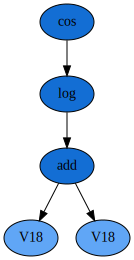

In [107]:
dot_data = est._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [30]:
# # Export to a graph instance
# graph = models['sc']._program.export_graphviz()  
# graph_str = str(graph)
# program_str = str(models['sc']._program)

# # Replace X{} with actual features names
# mapping_dict = {'X{}'.format(i): X.columns[i] for i in reversed(range(X.shape[1]))}

# for old_value, new_value in mapping_dict.items():
#     graph_str = graph_str.replace(old_value, new_value)
#     program_str = program_str.replace(old_value, new_value)

    
# # Save localy
# src = graphviz.Source(graph_str)
# src.render('result.gv', view=True)

'result.gv.pdf'